In [1]:
# Multi focus ellipse
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy

In [2]:
# Locus of points centered about n-foci, calculate its perimeter and its area!

In [3]:
class egglipse():
    
    def __init__(self, N, foci, distance):
        
        self.N = N                              # number of points... the more the better!
        self.foci = foci
        self.d = float(distance)
        self.dist_matrix = scipy.spatial.distance.pdist(self.foci)
        
        d01 = math.dist(foci[0,:], foci[1,:])
        d02 = math.dist(foci[0,:], foci[2,:])
        d21 = math.dist(foci[1,:], foci[2,:])
        
        self.inside = []
        self.outside = []
        
        # For the convex hull computation:
        self.hull_pts = []            # initialized as an empty list
        self.delta = np.pi/7500       # del theta = 1 degree
    
    
    
    def param_perimeter(self):
        
        fractional_spread = np.max([d01, d21, d02])*self.d/10
        print('scale = ', fractional_spread)
        x = np.random.randn(self.N)*self.d*(np.max([d01, d21, d02])/self.d)
        y = np.random.randn(self.N)*self.d*(np.max([d01, d21, d02])/self.d)
        
        # Compute sum of distances to the foci!
        for i in range(self.N):
            pt = np.array([x[i], y[i]])
            dist = 0                                 # initialize to 0 for every new pt considered!
            for j in range(self.foci.shape[0]):      # for the number of foci there are... do
                dist += math.dist(pt, self.foci[j,:])
            
            if dist <= self.d:
                self.inside.append(pt)
            else:
                self.outside.append(pt)
        
        self.inside = np.asarray(self.inside)
        print('self.inside shape: ', self.inside.shape)
        self.outside = np.asarray(self.outside)
        print('self.outside shape: ', self.outside.shape)
        
        
        
    def param_area(self):
        
        # f = np.max([d01, d21, d02])*self.d/10   # /self.d   # fractional_spread
        f = abs(np.max(foci)) + abs(np.min(foci))
        
        f = np.max((f, self.d)) * 1.15
        
        print('scale = ', f)
        
        X = np.linspace(-f/2, f/2, int(np.sqrt(self.N)))
        Y = np.linspace(-f/2, f/2, int(np.sqrt(self.N)))
        # y = np.random.randn(self.N)*self.d*(np.max([d01, d21, d02])/self.d)
        x, y = np.meshgrid(X, Y)
        x = x.reshape(-1);                    y = y.reshape(-1)
        
        # Compute sum of distances to the foci!
        for i in range(self.N):
            pt = np.array([x[i], y[i]])
            dist = 0                                 # initialize to 0 for every new pt considered!
            for j in range(self.foci.shape[0]):      # for the number of foci there are... do
                dist += math.dist(pt, self.foci[j,:])
            
            if dist <= self.d:
                self.inside.append(pt)
            else:
                self.outside.append(pt)
        
        self.inside = np.asarray(self.inside)
        print('number of points inside the shape: ', len(self.inside))
        self.outside = np.asarray(self.outside)
        print('number of points outside the shape: ', len(self.outside))
        
        
        # Computing the approximation of the area of the n-ellipse:
        self.area = (f**2) * len(self.inside) / self.N 
        return self.area
        
    
    
    def plot_points(self):
        plt.figure(figsize=(8,8))
        plt.scatter(self.inside[:,0], self.inside[:,1], s=3, c='b', marker='o')
        plt.scatter(self.outside[:,0], self.outside[:,1], s=3, c='r', marker='o', alpha=0.3)
        # plot the foci
        for i in range(self.foci.shape[0]):
            plt.scatter(self.foci[i,0], self.foci[i,1], s=20, c='k', marker='o')
        plt.title('Approximation of the {}-ellipse'.format(self.foci.shape[0]))
        plt.grid(True)
        plt.show()
        
    
    
    def compute_convex_hull(self):
        
        highest_pt = self.inside[list(self.inside[:,1]).index(np.max(self.inside[:,1])), :]
        self.hull_pts.append(highest_pt)
        next_highest = highest_pt
        
        count = 0;        cum_theta = 0
        R = np.array([[1, 0], [0, 1]])
        
        while cum_theta < 2*np.pi:
            count = 0;            val = False
            
            while val == False:
                
                rotated_pts = self.inside @ R
                maxY = np.max(rotated_pts[:,1])
                next_highest = rotated_pts[list(rotated_pts[:,1]).index(maxY), :]
                R_inv = np.array([[np.cos(cum_theta+count*self.delta), -np.sin(cum_theta+count*self.delta)],
                                  [np.sin(cum_theta+count*self.delta),  np.cos(cum_theta+count*self.delta)]])
                next_highest = next_highest @ R_inv
                count += 1
                R = np.array([[ np.cos(cum_theta+count*self.delta), np.sin(cum_theta+count*self.delta)],
                              [-np.sin(cum_theta+count*self.delta), np.cos(cum_theta+count*self.delta)]])
                n_h = np.array([round(next_highest[0], 5), round(next_highest[1], 5)])
                h_p = np.array([round(highest_pt[0], 5), round(highest_pt[1], 5)])
                diff = n_h - h_p
                val = diff.any()
                
            cum_theta += count*self.delta
            highest_pt = next_highest
            
            if ((abs(highest_pt[0]-self.hull_pts[0][0])<10**(-8)) and (abs(highest_pt[1]-self.hull_pts[0][1])<10**(-8))):
                break
            else:
                self.hull_pts.append(highest_pt)       
        
        
    
    def plot_piecewise_linear_n_ellipse(self):
        plt.figure(figsize=(9,9))
        self.hull_pts.append(self.hull_pts[0])    # appending the very first point at the end again (for a closed curve)
        self.hull_pts = np.asarray(self.hull_pts)
        plt.plot(self.hull_pts[:,0], self.hull_pts[:,1], linewidth=2.15, c='k', linestyle='solid')
        # plot the foci
        for i in range(self.foci.shape[0]):
            plt.scatter(self.foci[i,0], self.foci[i,1], s=90, c='k', marker='o')
        plt.grid(True)
        plt.title('Piecewise linear approximation of the {}-ellipse'.format(self.foci.shape[0]))
        plt.show()

Enter a distance value d: 334
scale =  384.09999999999997
number of points inside the shape:  2792
number of points outside the shape:  637208
(approximate) Area of the n-ellipse simulated =  643.6118836249999  u^2


<IPython.core.display.Javascript object>


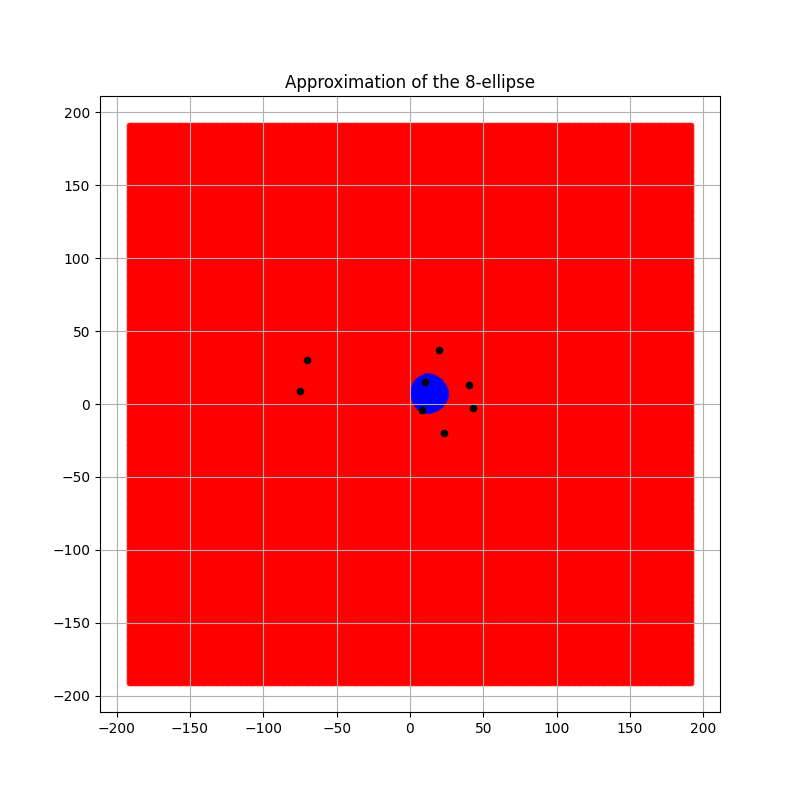

<IPython.core.display.Javascript object>


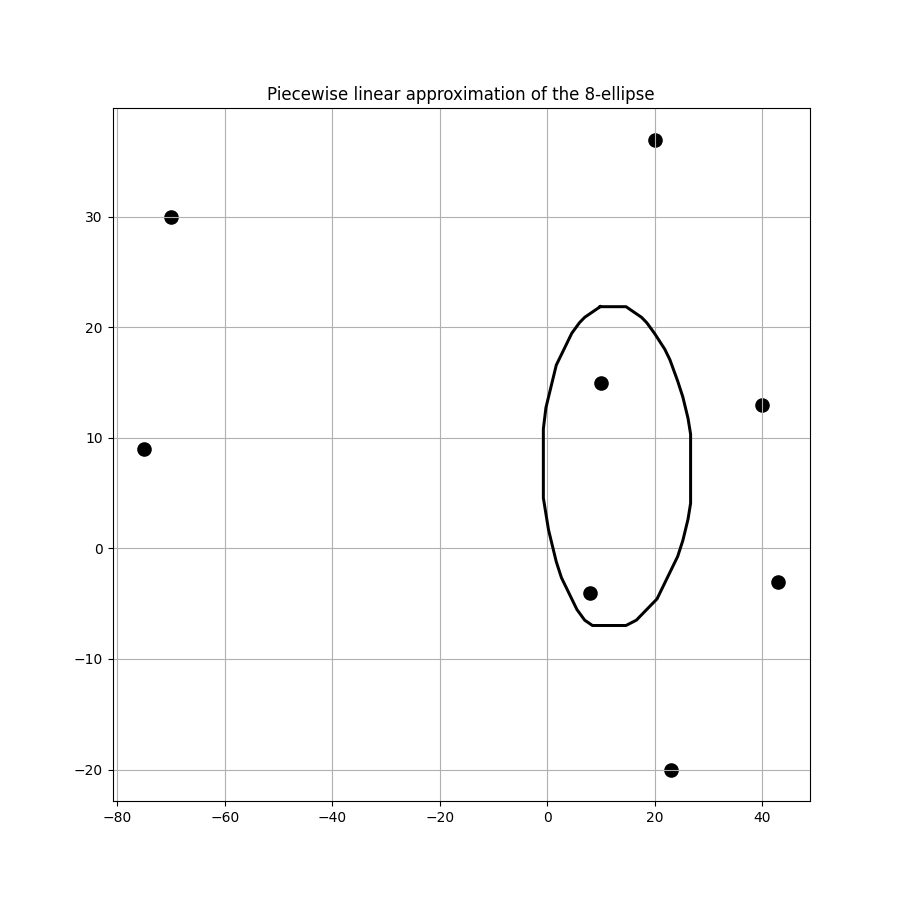

In [4]:
N = 640000

"""
# Interesting shape #1 :))
foci = np.array([[1,3], [12,-3], [-6, -6]])
d01 = math.dist(foci[0,:], foci[1,:])
d02 = math.dist(foci[0,:], foci[2,:])
d21 = math.dist(foci[1,:], foci[2,:])
d = np.max([d01, d21, d02])*1.5
"""


# Interesting shape #1 :))
# foci = np.array([[-75,8], [-4,-103], [-3, -6], [200, 370], [0, 40]])   # with d=2000 and 53453/586547 and Area of the n-ellipse simulated =  441822.453125  u^2


foci = np.array([[-75,9], [-70,30], [10,15], [20,37], [40,13], [8,-4], [23,-20], [43,-3]])  
# SMALLEST:
# with d=334; 2792/637208            Area: 643.6118836249999  u^2
# MEDIUM:
# d=650;    19269/620731         and area = 16822.928408203123  u^2
# BIGGEST....  circle like!
# same foci, d=3400,   23556/616444       area=562697.6306249999  u^2
#



# d = input('Enter a distance value greater than {}:     '.format(d))
d = input('Enter a distance value d: ')

ne = egglipse(N, foci, d)

# ne.param_perimeter()

area = ne.param_area()

print('(approximate) Area of the n-ellipse simulated = ', area, ' u^2')

ne.plot_points()

ne.compute_convex_hull()

ne.plot_piecewise_linear_n_ellipse()